# 영문 워드클라우드

In [1]:
# NLTK (Natural Language ToolKit)
import nltk

In [2]:
# NLTK 에서 사용하는 데이터는 다운로드 받아야 함
# VS Code :  1회 다운받으면 됨
# Colab : 접속할 때마다 다운받아야됨
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

- StopWords 처리

In [6]:
# NLTK stopwords
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# wordcloud 에서 제공하는 불용어(stopwords)
sw_wc = STOPWORDS
print(sw_wc)

{"we're", 'some', 'i', 'from', 'had', 'about', 'he', 'on', 'she', "we've", 'only', 'those', 'than', 'so', 'again', 'else', 'both', 'com', "he'll", 'not', "they'd", "what's", 'having', 'where', 'your', "we'd", 'between', 'does', 'after', 'to', 'nor', "you're", 'our', "there's", 'him', 'other', 'should', 'in', 'of', 'it', 'since', 'a', 'while', 'no', 'above', 'has', 'himself', 'could', 'we', "they're", 'by', 'this', 'like', "we'll", "when's", "why's", "isn't", 'herself', "that's", 'just', 'itself', 'which', 'www', "shan't", "couldn't", 'therefore', 'if', 'were', 'who', 'however', 'here', 'the', 'for', "who's", 'also', 'shall', 'get', 'doing', "they've", 'theirs', 'or', 'you', 'down', 'few', 'these', 'ever', 'would', 'whom', 'when', "she's", 'http', "how's", "wouldn't", "shouldn't", "hasn't", 'are', 'ours', "they'll", 'his', 'all', 'off', 'they', "won't", 'but', 'out', "it's", 'can', "didn't", 'did', 'ought', 'up', 'then', 'yours', 'such', "i've", 'more', "here's", 'through', 'under', 'as

In [8]:
len(sw_nltk), len(sw_wc)

(179, 192)

- Alice in Wonderland

In [10]:
with open('data/Alice.txt') as file:
    text = file.read()

In [11]:
# stopwords 에 'said 단어 추가
sw_wc.add('said')

In [12]:
wc = WordCloud(background_color='white',
               max_words=2000, stopwords=sw_wc)
wc = wc.generate(text) 

In [17]:
count = 10
for key, val in wc.words_.items():
    print(key, ':', val)
    count += 1
    if count > 20:
        break

Alice : 1.0
little : 0.29508196721311475
one : 0.27595628415300544
know : 0.2459016393442623
went : 0.226775956284153
thing : 0.2185792349726776
time : 0.2103825136612022
Queen : 0.20765027322404372
see : 0.1830601092896175
King : 0.17486338797814208
well : 0.1721311475409836


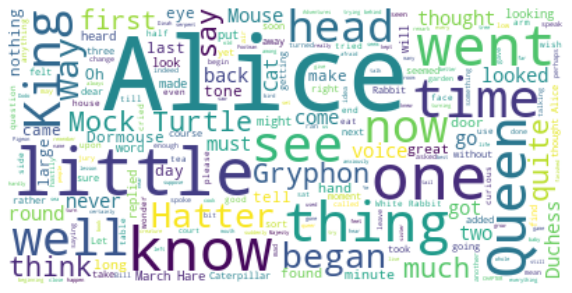

In [18]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 그림위에 표시하기

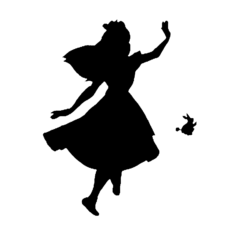

In [19]:
mask = np.array(Image.open('data/Alice_mask.png'))
plt.imshow(mask, cmap= plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
wc = WordCloud(background_color='white', mask= mask,
               max_words=1000, stopwords=sw_wc).generate(text) 

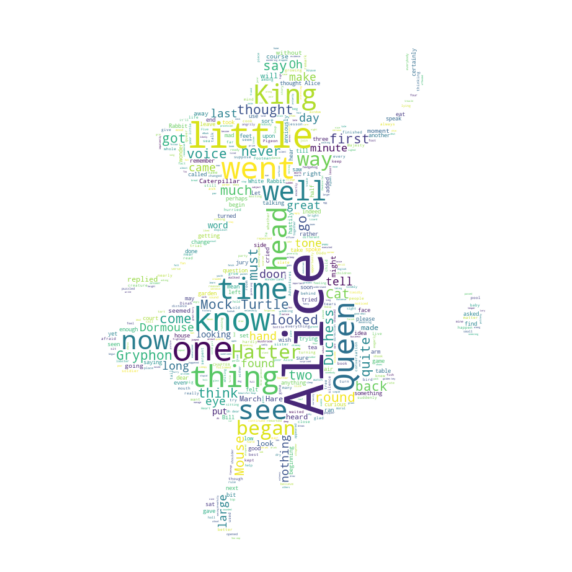

In [23]:
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 3.star wars

In [24]:
with open('data/A_new_hope.txt') as file:
    text = file.read()
text = text.replace('HAN', 'Han').replace("LUKE's",'Luke')

In [25]:
sw = STOPWORDS
sw.add('int')
sw.add('ext')
len(sw)

195

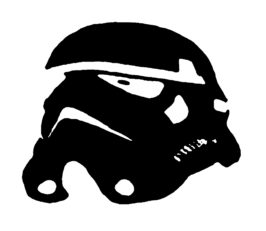

In [27]:
mask = np.array(Image.open('data/Stormtrooper_mask.png'))
plt.imshow(mask, cmap= plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
wc = WordCloud( mask= mask,max_words=1000, stopwords=sw_wc,
                margin=10, random_state=2022).generate(text) 
default_colors = wc.to_array

In [30]:
def grey_color(word,font_size, position, orientation, random_stae, **kwargs):
    return f'hsl(0,0%,{np.random.randint(60,101)}%)'

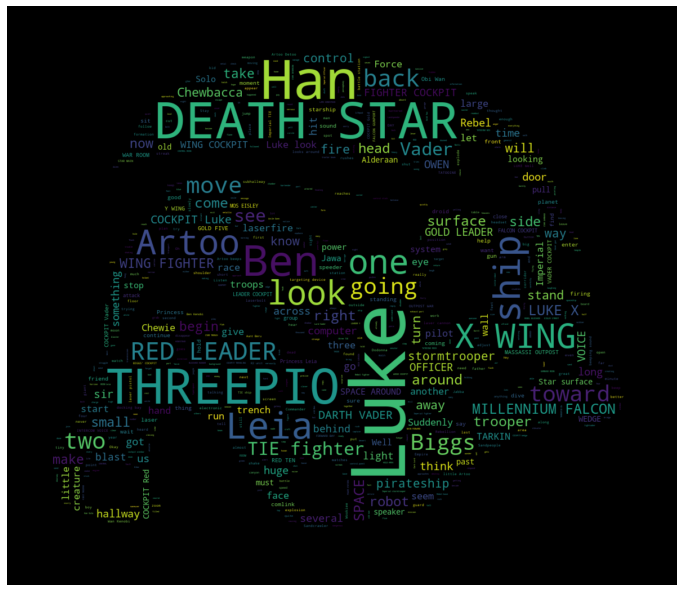

In [34]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()